In [1]:
import pandas as pd
import numpy as np

In [84]:
train_df = pd.read_csv('cs-training.csv')
test_df = pd.read_csv('cs-test.csv')

In [ ]:
features = train_df.drop('Unnamed: 0', axis=1).columns.tolist()

# Explore data

In [10]:
train_df[features].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
test_df[features].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


## Check NA counts

In [29]:
train_df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [35]:
test_df.isna().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [7]:
label_col = 'SeriousDlqin2yrs'
features = train_df.columns.tolist()
features.remove(label_col)

In [24]:
print(features)

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


## Check linear correlations

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

nbr_features = len(features)
chosen_df = train_df[features + [label_col]]
corr_df = chosen_df.corr()
corr_df = corr_df.round(2)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(nbr_features, nbr_features))
ax = plt.axes()
ax.set_title('Correlation matrix', fontsize=30)
sns.heatmap(corr_df,
            vmin=-1,
            vmax=1,
            cmap='coolwarm_r',
            annot=True,
            mask=mask,
            ax=ax)

## Initial modelling

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

X, y = train_df.dropna()[features], train_df.dropna()[label_col]

k = 5
auc_scores = np.zeros((k,))
for i, (train_idx, val_idx) in enumerate(StratifiedKFold(n_splits=k, random_state=999, shuffle=True).split(X, y)):
    X_train_subset, y_train_subset = X.iloc[train_idx].values, y.iloc[train_idx].values
    X_val_subset, y_val_subset = X.iloc[val_idx].values, y.iloc[val_idx].values

    clf = RandomForestClassifier()
    clf.fit(X_train_subset, y_train_subset)
    y_hat = clf.predict_proba(X_val_subset)[:, 1]

    # Evaluate AUC score
    score = roc_auc_score(y_val_subset, y_hat)
    auc_scores[i] = score

print(f'AUC Mean: {auc_scores.mean()}, AUC Std: {auc_scores.std()}')

AUC Mean: 0.8300258841859037, AUC Std: 0.004950210035184189


## Impute missing values

In [4]:
train_df = train_df.fillna(train_df.mean())
train_df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

X, y = train_df[features], train_df[label_col]

k = 5
auc_scores = np.zeros((k,))
for i, (train_idx, val_idx) in enumerate(StratifiedKFold(n_splits=k, random_state=999, shuffle=True).split(X, y)):
    X_train_subset, y_train_subset = X.iloc[train_idx].values, y.iloc[train_idx].values
    X_val_subset, y_val_subset = X.iloc[val_idx].values, y.iloc[val_idx].values

    clf = RandomForestClassifier()
    clf.fit(X_train_subset, y_train_subset)
    y_hat = clf.predict_proba(X_val_subset)[:, 1]

    # Evaluate AUC score
    score = roc_auc_score(y_val_subset, y_hat)
    auc_scores[i] = score

print(f'AUC Mean: {auc_scores.mean()}, AUC Std: {auc_scores.std()}')

AUC Mean: 0.840679774499287, AUC Std: 0.003610485443550794


# Modelling algorithm selection

In [9]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


classifiers = [
    {
        'model_name': 'RandomForestClassifier 100t 3d',
        'model_class': RandomForestClassifier,
        'model_params': {
            'n_estimators': 100,
            'max_depth': 3,
            'min_samples_leaf': 100,
            'n_jobs': -1
        }
    },
    {
        'model_name': 'RandomForestClassifier 300 5d',
        'model_class': RandomForestClassifier,
        'model_params': {
            'n_estimators': 300,
            'max_depth': 5,
            'min_samples_leaf': 100,
            'n_jobs': -1
        }
    },
    {
        'model_name': 'ExtraTreesClassifier 100t 3d',
        'model_class': ExtraTreesClassifier,
        'model_params': {
            'n_estimators': 100,
            'max_depth': 3,
            'min_samples_leaf': 100,
            'n_jobs': -1
        }
    },
    {
        'model_name': 'ExtraTreesClassifier 300t 5d',
        'model_class': ExtraTreesClassifier,
        'model_params': {
            'n_estimators': 300,
            'max_depth': 5,
            'min_samples_leaf': 100,
            'n_jobs': -1
        }
    },
    {
        'model_name': 'LogisticRegression 1C liblinear',
        'model_class': LogisticRegression,
        'model_params': {
            'solver': 'liblinear',
            'C': 1.0
        }
    },
    {
        'model_name': 'LogisticRegression 10C liblinear',
        'model_class': LogisticRegression,
        'model_params': {
            'solver': 'liblinear',
            'C': 10.0
        }
    },
    {
        'model_name': 'LogisticRegression 0.1C liblinear',
        'model_class': LogisticRegression,
        'model_params': {
            'solver': 'liblinear',
            'C': 0.1
        }
    },
    {
        'model_name': 'PCA n2 => Logistic Regression 1.0c',
        'model_class': Pipeline,
        'model_params': {
            'list': '''[
                ('pca', PCA(n_components=2)),
                ('svc', LogisticRegression(**{'C': 1.0, 'solver': 'liblinear'}))
            ]'''
        }
    },
    {
        'model_name': 'PCA n5 => Logistic Regression 1.0c',
        'model_class': Pipeline,
        'model_params': {
            'list': '''[
                ('pca', PCA(n_components=5)),
                ('svc', LogisticRegression(**{'C': 1.0, 'solver': 'liblinear'}))
            ]'''
        }
    },
    {
        'model_name': 'PCA n10 => Logistic Regression 1.0c',
        'model_class': Pipeline,
        'model_params': {
            'list': '''[
                ('pca', PCA(n_components=10)),
                ('svc', LogisticRegression(**{'C': 1.0, 'solver': 'liblinear'}))
            ]'''
        }
    },
    {
        'model_name': 'AdaBoostClassifier 50r 0.05lr',
        'model_class': AdaBoostClassifier,
        'model_params': {
            'learning_rate': 0.05,
            'n_estimators': 50
        }
    },
    {
        'model_name': 'AdaBoostClassifier 100r 0.05lr',
        'model_class': AdaBoostClassifier,
        'model_params': {
            'learning_rate': 0.05,
            'n_estimators': 100,
        }
    },
    {
        'model_name': 'AdaBoostClassifier 200r 0.05lr',
        'model_class': AdaBoostClassifier,
        'model_params': {
            'learning_rate': 0.05,
            'n_estimators': 200,
        }
    },
#     {
#         'model_name': 'SVC linear 1.0c',
#         'model_class': Pipeline,
#         'model_params': {
#             'list': '''[
#                 ('scaler', StandardScaler()),
#                 ('svc', SVC(**{'C': 1.0, 'kernel': 'linear', 'gamma': 'auto', 'probability': True}))
#             ]'''
#         }
#     },
#     {
#         'model_name': 'SVC linear 5.0c',
#         'model_class': Pipeline,
#         'model_params': {
#             'list': '''[
#                 ('scaler', StandardScaler()),
#                 ('svc', SVC(**{'C': 5.0, 'kernel': 'linear', 'gamma': 'auto', 'probability': True}))
#             ]'''
#         }
#     },
#     {
#         'model_name': 'SVC RBF 1.0c',
#         'model_class': Pipeline,
#         'model_params': {
#             'list': '''[
#                 ('scaler', StandardScaler()),
#                 ('svc', SVC(**{'C': 1.0, 'kernel': 'rbf', 'gamma': 'auto', 'probability': True}))
#             ]'''
#         }
#     },
#     {
#         'model_name': 'SVC RBF 5.0c',
#         'model_class': Pipeline,
#         'model_params': {
#             'list': '''[
#                 ('scaler', StandardScaler()),
#                 ('svc', SVC(**{'C': 5.0, 'kernel': 'rbf', 'gamma': 'auto', 'probability': True}))
#             ]'''
#         }
#     },
#     {
#         'model_name': 'SVC Poly 2d 1.0c',
#         'model_class': Pipeline,
#         'model_params': {
#             'list': '''[
#                 ('scaler', StandardScaler()),
#                 ('svc', SVC(**{'C': 1.0, 'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'probability': True}))
#             ]'''
#         }
#     },
#     {
#         'model_name': 'SVC Poly 3d 1.0c',
#         'model_class': Pipeline,
#         'model_params': {
#             'list': '''[
#                 ('scaler', StandardScaler()),
#                 ('svc', SVC(**{'C': 1.0, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'probability': True}))
#             ]'''
#         }
#     },
#     {
#         'model_name': 'SVC Poly 4d 1.0c',
#         'model_class': Pipeline,
#         'model_params': {
#             'list': '''[
#                 ('scaler', StandardScaler()),
#                 ('svc', SVC(**{'C': 1.0, 'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'probability': True}))
#             ]'''
#         }
#     },
    {
        'model_name': 'XGBoost 100r 0.05lr 3d',
        'model_class': XGBClassifier,
        'model_params': {
            'learning_rate': 0.05,
            'n_estimators': 100,
            'max_depth': 3,
            'n_jobs': -1
        }
    },
    {
        'model_name': 'XGBoost 100r 0.05lr 4d',
        'model_class': XGBClassifier,
        'model_params': {
            'learning_rate': 0.05,
            'n_estimators': 100,
            'max_depth': 4,
            'n_jobs': -1
        }
    },
    {
        'model_name': 'XGBoost 200r 0.05lr 4d',
        'model_class': XGBClassifier,
        'model_params': {
            'learning_rate': 0.05,
            'n_estimators': 200,
            'max_depth': 4,
            'n_jobs': -1
        }
    },
    {
        'model_name': 'XGBoost 100r 0.05lr 5d',
        'model_class': XGBClassifier,
        'model_params': {
            'learning_rate': 0.05,
            'n_estimators': 100,
            'max_depth': 5,
            'n_jobs': -1
        }
    },
]

In [10]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

label_col = 'SeriousDlqin2yrs'
X = train_df[features]
y = train_df[label_col]
feature_subset = features
k = 3
random_state = 999

clf_results = []
for clf_config in classifiers:
    clf_klass = clf_config['model_class']
    clf_params = clf_config['model_params']
    clf_name = clf_config['model_name']

    print('Training', clf_name, '...')

    
    auc_scores = np.zeros((k,))
    for i, (train_idx, val_idx) in enumerate(StratifiedKFold(n_splits=k, random_state=random_state, shuffle=True).split(X, y)):
        X_train_subset, y_train_subset = X[feature_subset].iloc[train_idx].values, y.iloc[train_idx].values
        X_val_subset, y_val_subset = X[feature_subset].iloc[val_idx].values, y.iloc[val_idx].values

        if clf_klass == Pipeline:
            clf = clf_klass(steps=eval(clf_params['list']))
        else:
            clf = clf_klass(**clf_params)
        clf.fit(X_train_subset, y_train_subset)
        y_hat = clf.predict_proba(X_val_subset)[:, 1]

        # Evaluate AUC score
        score = roc_auc_score(y_val_subset, y_hat)
        auc_scores[i] = score

    auc_mean = auc_scores.mean()
    auc_std = auc_scores.std()

    clf_results.append([clf_name, auc_mean, auc_std])

Training RandomForestClassifier 100t 3d ...
Training RandomForestClassifier 300 5d ...
Training ExtraTreesClassifier 100t 3d ...
Training ExtraTreesClassifier 300t 5d ...
Training LogisticRegression 1C liblinear ...
Training LogisticRegression 10C liblinear ...
Training LogisticRegression 0.1C liblinear ...
Training PCA n2 => Logistic Regression 1.0c ...
Training PCA n5 => Logistic Regression 1.0c ...
Training PCA n10 => Logistic Regression 1.0c ...
Training AdaBoostClassifier 50r 0.05lr ...
Training AdaBoostClassifier 100r 0.05lr ...
Training AdaBoostClassifier 200r 0.05lr ...
Training XGBoost 100r 0.05lr 3d ...
Training XGBoost 100r 0.05lr 4d ...
Training XGBoost 200r 0.05lr 4d ...
Training XGBoost 100r 0.05lr 5d ...


In [15]:
df_modelling_results = pd.DataFrame(clf_results, columns=['Classifier', 'AUC mean', 'AUC std'])
df_modelling_results.sort_values('AUC mean', inplace=False, ascending=False)
# df_modelling_results.to_csv('documentation/modelling_results.csv', index=False)

,Classifier,AUC mean,AUC std
15,XGBoost 200r 0.05lr 4d,0.864584,0.004446
16,XGBoost 100r 0.05lr 5d,0.862459,0.004513
14,XGBoost 100r 0.05lr 4d,0.861229,0.004696
13,XGBoost 100r 0.05lr 3d,0.859014,0.004774
1,RandomForestClassifier 300 5d,0.858760,0.004969
12,AdaBoostClassifier 200r 0.05lr,0.856643,0.005005
0,RandomForestClassifier 100t 3d,0.852986,0.006036
11,AdaBoostClassifier 100r 0.05lr,0.850876,0.005110
10,AdaBoostClassifier 50r 0.05lr,0.842842,0.004457
3,ExtraTreesClassifier 300t 5d,0.822608,0.006408


# Model tuning

In [22]:
trainval_X, trainval_Y = train_df[features], train_df[label_col]

In [32]:
import xgboost
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

def optimize_n_estimators(alg, train_X, train_Y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgboost.DMatrix(train_X.values, label=train_Y.values)
        cvresult = xgboost.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train_X, train_Y, eval_metric='auc')
        
    #Predict training set:
    dtrain_predprob = alg.predict_proba(train_X)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("AUC Score (Train): %f" % roc_auc_score(train_Y, dtrain_predprob))
    print ("n_estimators: ", cvresult.shape[0])
    print ("CV result: ", cvresult)
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    if useTrainCV:
        return cvresult.shape[0]
    

## Initialize high learning rate

In [33]:
xgb_params = {
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_jobs': 32,
    'booster':'gbtree',
    'scale_pos_weight': 1,
    'seed': 2020,
    'base_score':0.5, 
}


Model Report
AUC Score (Train): 0.877871
n_estimators:  93
CV result:      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.812404       0.001853       0.810653      0.004857
1         0.852019       0.002683       0.849799      0.006818
2         0.854930       0.000652       0.852128      0.006025
3         0.855360       0.001436       0.852923      0.005547
4         0.857015       0.000974       0.854350      0.005171
..             ...            ...            ...           ...
88        0.879869       0.001549       0.865435      0.005295
89        0.880038       0.001550       0.865454      0.005272
90        0.880207       0.001489       0.865442      0.005232
91        0.880355       0.001514       0.865443      0.005221
92        0.880460       0.001507       0.865469      0.005260

[93 rows x 4 columns]


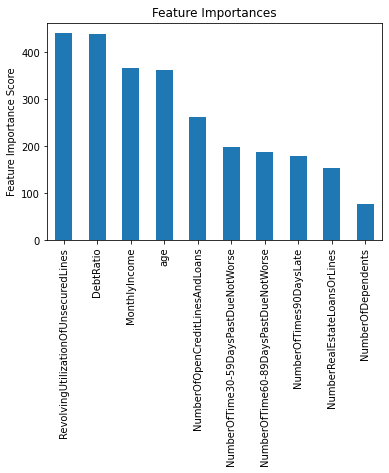

In [34]:
xgb1 = XGBClassifier(**xgb_params)
n_estimators = optimize_n_estimators(xgb1, trainval_X, trainval_Y)
xgb_params['n_estimators'] = n_estimators
xgb_params['n_jobs'] = 4

## Tune scale_pos_weight

In [38]:
trainval_Y.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [40]:
from sklearn.model_selection import GridSearchCV
import math

init_scale_pos_weight = round(trainval_Y.value_counts().loc[0] / trainval_Y.value_counts().loc[1], 2)

param_test7 = {
    'scale_pos_weight': np.linspace(1, init_scale_pos_weight + math.sqrt(init_scale_pos_weight), num=10)
}
gsearch7 = GridSearchCV(estimator=XGBClassifier(**xgb_params), 
                        param_grid=param_test7, scoring='roc_auc', n_jobs=8, iid=False, cv=5, verbose=2)
gsearch7.fit(trainval_X, trainval_Y)
gsearch7.best_params_, gsearch7.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   35.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:  4.6min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'scale_pos_weight': 5.770373810986824}, 0.865670886442443)

In [43]:
xgb_params['scale_pos_weight'] = gsearch7.best_params_['scale_pos_weight']

## Tune max_depth & min_child_weight

In [44]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
     'max_depth': range(3,10,2),
     'min_child_weight': range(1,6,2)
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(**xgb_params), 
                        param_grid=param_test1, scoring='roc_auc', n_jobs=8, iid=False, cv=5, verbose=2)
gsearch1.fit(trainval_X, trainval_Y)
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   28.6s
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  1.3min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 5, 'min_child_weight': 1}, 0.865670886442443)

In [46]:
xgb_params['max_depth'] = gsearch2.best_params_['max_depth']
xgb_params['min_child_weight'] = gsearch2.best_params_['min_child_weight']

## Tune gamma

In [47]:
from sklearn.model_selection import GridSearchCV

param_test3 = {
    'gamma': [i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(
    estimator=XGBClassifier(**xgb_params), param_grid=param_test3, 
    scoring='roc_auc', n_jobs=8, iid=False, cv=5, verbose=2)
gsearch3.fit(trainval_X, trainval_Y)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  23 out of  25 | elapsed:   26.8s remaining:    2.3s
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:   29.2s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'gamma': 0.4}, 0.8657654343660687)

In [48]:
xgb_params['gamma'] = gsearch3.best_params_['gamma']

## Optimize n_estimators for tuned parameters


Model Report
AUC Score (Train): 0.881151
n_estimators:  89
CV result:      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.815509       0.002488       0.811875      0.005944
1         0.852253       0.002327       0.848702      0.007733
2         0.856059       0.000900       0.852922      0.006701
3         0.857022       0.000706       0.853915      0.006183
4         0.858144       0.000745       0.855098      0.005993
..             ...            ...            ...           ...
84        0.883381       0.001414       0.865743      0.005394
85        0.883546       0.001478       0.865767      0.005378
86        0.883715       0.001488       0.865780      0.005385
87        0.883837       0.001486       0.865801      0.005437
88        0.883997       0.001497       0.865809      0.005388

[89 rows x 4 columns]


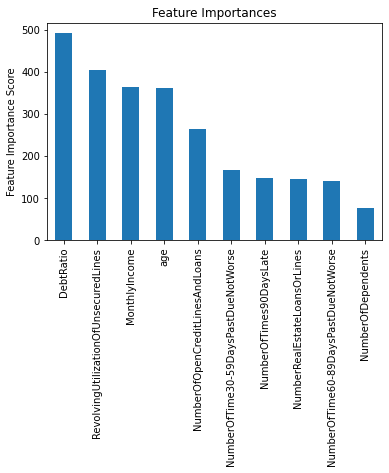

In [49]:
xgb_params['n_estimators'] = 1000
xgb1 = XGBClassifier(**xgb_params)
n_estimators = optimize_n_estimators(xgb1, trainval_X, trainval_Y)
xgb_params['n_estimators'] = n_estimators

## Tune subsample & colsample_bytree

In [50]:
from sklearn.model_selection import GridSearchCV

param_test4 = {
     'subsample': [i/10.0 for i in range(6,10)],
     'colsample_bytree': [i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(
    estimator=XGBClassifier(**xgb_params), param_grid=param_test4, 
    scoring='roc_auc', n_jobs=8, iid=False, cv=5, verbose=2)
gsearch4.fit(trainval_X, trainval_Y)
gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   30.8s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:  1.4min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.8657732796933472)

In [51]:
from sklearn.model_selection import GridSearchCV

param_test5 = {
 'subsample': [i/100.0 for i in range(int(gsearch4.best_params_['subsample'] * 100 - 10), 
                                      int(gsearch4.best_params_['subsample'] * 100 + 15), 
                                      5)],
 'colsample_bytree': [i/100.0 for i in range(int(gsearch4.best_params_['colsample_bytree'] * 100 - 10), 
                                             int(gsearch4.best_params_['colsample_bytree'] * 100 + 15), 
                                             5)],
}
gsearch5 = GridSearchCV(
    estimator=XGBClassifier(**xgb_params), param_grid=param_test5, 
    scoring='roc_auc', n_jobs=8, iid=False, cv=5, verbose=2)
gsearch5.fit(trainval_X, trainval_Y)
gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   31.4s
[Parallel(n_jobs=8)]: Done 125 out of 125 | elapsed:  2.2min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'colsample_bytree': 0.8, 'subsample': 0.75}, 0.8658445325829103)

In [52]:
xgb_params['subsample'] = gsearch5.best_params_['subsample']
xgb_params['colsample_bytree'] = gsearch5.best_params_['colsample_bytree']

## Tune reg_alpha

In [53]:
from sklearn.model_selection import GridSearchCV

param_test6 = {
 'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(
    estimator=XGBClassifier(**xgb_params), param_grid=param_test6, 
    scoring='roc_auc', n_jobs=8, iid=False, cv=5, verbose=2)
gsearch6.fit(trainval_X, trainval_Y)
gsearch6.best_params_, gsearch6.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  23 out of  25 | elapsed:   25.9s remaining:    2.3s
[Parallel(n_jobs=8)]: Done  25 out of  25 | elapsed:   28.3s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'reg_alpha': 1e-05}, 0.8658445343653141)

In [54]:
xgb_params['reg_alpha'] = gsearch6.best_params_['reg_alpha']

## Optimize n_estimators for final parameters with lowered learning rate


Model Report
AUC Score (Train): 0.880874
n_estimators:  167
CV result:       train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0          0.815445       0.002319       0.811870      0.006328
1          0.852198       0.002235       0.848773      0.007758
2          0.855550       0.001456       0.852527      0.006174
3          0.856499       0.001358       0.853423      0.005977
4          0.857587       0.001236       0.854280      0.005633
..              ...            ...            ...           ...
162        0.883064       0.001466       0.865978      0.005603
163        0.883153       0.001472       0.865986      0.005595
164        0.883262       0.001463       0.866003      0.005596
165        0.883368       0.001464       0.866006      0.005591
166        0.883474       0.001469       0.866012      0.005574

[167 rows x 4 columns]


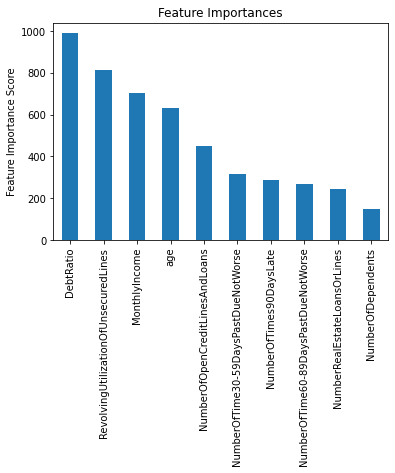

In [55]:
xgb_params['n_estimators'] = 1000
xgb_params['learning_rate'] = 0.05
xgb_params['n_jobs'] = 16

xgb1 = XGBClassifier(**xgb_params)
n_estimators = optimize_n_estimators(xgb1, trainval_X, trainval_Y)
xgb_params['n_estimators'] = n_estimators

## Show best_parameters

In [56]:
best_param_dict = xgb_params
best_param_dict

{'learning_rate': 0.05,
 'n_estimators': 167,
 'max_depth': 5,
 'min_child_weight': 1,
 'gamma': 0.4,
 'subsample': 0.75,
 'colsample_bytree': 0.8,
 'n_jobs': 16,
 'booster': 'gbtree',
 'scale_pos_weight': 5.770373810986824,
 'seed': 2020,
 'base_score': 0.5,
 'reg_alpha': 1e-05}

## Evaluate best model

In [58]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

X, y = train_df[features], train_df[label_col]

k = 5
auc_scores = np.zeros((k,))
for i, (train_idx, val_idx) in enumerate(StratifiedKFold(n_splits=k, random_state=999, shuffle=True).split(X, y)):
    X_train_subset, y_train_subset = X.iloc[train_idx].values, y.iloc[train_idx].values
    X_val_subset, y_val_subset = X.iloc[val_idx].values, y.iloc[val_idx].values

    clf = XGBClassifier(**best_param_dict)
    clf.fit(X_train_subset, y_train_subset)
    y_hat = clf.predict_proba(X_val_subset)[:, 1]

    # Evaluate AUC score
    score = roc_auc_score(y_val_subset, y_hat)
    auc_scores[i] = score

print(f'AUC Mean: {auc_scores.mean()}, AUC Std: {auc_scores.std()}')

AUC Mean: 0.8658982407946425, AUC Std: 0.004878409658261204


# Train best model

In [63]:
best_model = XGBClassifier(**best_param_dict)
best_model.fit(trainval_X, trainval_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=167, n_jobs=16,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=5.770373810986824,
              seed=2020, silent=None, subsample=0.75, verbosity=1)

# Explain best model

In [ ]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(train_df[features])
shap.summary_plot(shap_values, train_df[features], max_display = min(15, len(features)), color='green')
shap.summary_plot(shap_values, train_df[features], plot_type="bar", max_display = min(15, len(features)), color='green')

# Generate predictions

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [85]:
test_df = test_df.fillna(test_df.mean())

In [86]:
test_df['Probability'] = best_model.predict_proba(test_df.fillna(test_df.mean())[features])[:,1]

In [87]:
test_df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,1,NaN,0.885519,43,0,0.177513,5700.00000,4,0,0,0,0.000000,0.289201
1,2,NaN,0.463295,57,0,0.527237,9141.00000,15,0,4,0,2.000000,0.210143
2,3,NaN,0.043275,59,0,0.687648,5083.00000,12,0,1,0,2.000000,0.067803
3,4,NaN,0.280308,38,1,0.925961,3200.00000,7,0,2,0,0.000000,0.311210
4,5,NaN,1.000000,27,0,0.019917,3865.00000,4,0,0,0,1.000000,0.415595
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.00000,5,0,0,0,0.000000,0.157863
101499,101500,NaN,0.922156,36,3,0.934217,7615.00000,8,0,2,0,4.000000,0.747479
101500,101501,NaN,0.081596,70,0,836.000000,6855.03559,3,0,0,0,0.769046,0.025231
101501,101502,NaN,0.335457,56,0,3568.000000,6855.03559,8,0,2,1,3.000000,0.285137


In [88]:
test_df['Id'] = test_df['Unnamed: 0']

In [89]:
import datetime
test_df[['Id', 'Probability']].to_csv(f'submission__{datetime.datetime.now().strftime("%Y-%m-%d__%H-%M")}.csv', index=False, header=True)